### 一.相关库及数据的导入

In [1]:
# 库引用
import numpy as np
import pandas as pd
import seaborn as sns #快速绘图接口
import matplotlib.pyplot as plt #详细绘图用plt
from matplotlib import rcParams #导入matplotlib的配置接口
rcParams['font.sans-serif'] = ['SimHei'] #设置中文字体为黑体，解决中文乱码
rcParams['axes.unicode_minus'] = False #设置负号显示

# 数据导入并预览
df = pd.read_csv('data/house_sales.csv')
print(df.head())
print("="*100)
print(df.info())

  city              address area     floor    name price province rooms  \
0   合肥   龙岗-临泉东路和王岗大道交叉口东南角  90㎡  中层（共18层）    圣地亚哥  128万       安徽  3室2厅   
1   合肥   龙岗-临泉东路和王岗大道交叉口东南角  90㎡  中层（共18层）    圣地亚哥  128万       安徽  3室2厅   
2   合肥      生态公园-淮海大道与大众路交口  95㎡  中层（共18层）  正荣·悦都荟  132万       安徽  3室2厅   
3   合肥      生态公园-淮海大道与大众路交口  95㎡  中层（共18层）  正荣·悦都荟  132万       安徽  3室2厅   
4   合肥  撮镇-文一名门金隅裕溪路与东风大道交口  37㎡  中层（共22层）  文一名门金隅   32万       安徽  2室1厅   

  toward      unit    year                                       origin_url  
0    南北向  14222元/㎡  2013年建  https://hf.esf.fang.com/chushou/3_404230646.htm  
1    南北向  14222元/㎡  2013年建  https://hf.esf.fang.com/chushou/3_404230646.htm  
2     南向  13895元/㎡  2019年建  https://hf.esf.fang.com/chushou/3_404304901.htm  
3     南向  13895元/㎡  2019年建  https://hf.esf.fang.com/chushou/3_404304901.htm  
4    南北向   8649元/㎡  2017年建  https://hf.esf.fang.com/chushou/3_404372096.htm  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106118 entries, 0 to 106117
Dat

### 二.数据清洗
#### 1.删除无用列

In [2]:
"""
origin_url列显然无大用，故我们将该列删除
"""
df.drop(columns=['origin_url'],inplace=True) #columns指定列,inplace指定是否改变原数据,True则在源数据的基础上删
df.head()

,city,address,area,floor,name,price,province,rooms,toward,unit,year
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建
1,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建
2,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建
3,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37㎡,中层（共22层）,文一名门金隅,32万,安徽,2室1厅,南北向,8649元/㎡,2017年建


#### 2.检查缺失并处理

In [4]:
# 检查是否有缺失值
df.isna().sum()
# 删除缺失值
df.dropna(inplace=True)
df

,city,address,area,floor,name,price,province,rooms,toward,unit,year
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建
1,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建
2,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建
3,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37㎡,中层（共22层）,文一名门金隅,32万,安徽,2室1厅,南北向,8649元/㎡,2017年建
...,...,...,...,...,...,...,...,...,...,...,...
106085,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,85㎡,高层（共25层）,南郡,75万,四川,2室1厅,南向,8824元/㎡,2016年建
106086,广元,利州广场-广元市利州区兴安路519号,85㎡,低层（共18层）,御景湾,86万,四川,2室2厅,西南向,10118元/㎡,2015年建
106087,广元,利州广场-广元市利州区兴安路519号,85㎡,低层（共18层）,御景湾,86万,四川,2室2厅,西南向,10118元/㎡,2015年建
106088,广元,永隆百货-老城大西街附近,78㎡,低层（共18层）,翰泊新城,79万,四川,2室2厅,南向,10128元/㎡,2015年建


#### 3.检查重复值

In [5]:
# 找重复数据
print(df.duplicated().sum()) #全条目检索，当整行相同则为重复
# 删除重复数据
df.drop_duplicates(inplace=True)
df

29416


,city,address,area,floor,name,price,province,rooms,toward,unit,year
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建
2,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37㎡,中层（共22层）,文一名门金隅,32万,安徽,2室1厅,南北向,8649元/㎡,2017年建
6,合肥,龙岗-长江东路与和县里交口,50㎡,高层（共30层）,柏庄金座,46万,安徽,2室1厅,南向,9200元/㎡,2019年建
8,合肥,新亚汽车站-张洼路与临泉路交汇处向北100米(原红星机械,120㎡,中层（共27层）,天目未来,158万,安徽,4室2厅,南向,13167元/㎡,2012年建
...,...,...,...,...,...,...,...,...,...,...,...
106080,广元,万达广场-雪峰,61.11㎡,中层（共6层）,富康小区,37万,四川,2室2厅,南北向,6055元/㎡,2012年建
106082,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,89.94㎡,中层（共26层）,南郡,73万,四川,2室2厅,南向,8117元/㎡,2016年建
106084,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,85㎡,高层（共25层）,南郡,75万,四川,2室1厅,南向,8824元/㎡,2016年建
106086,广元,利州广场-广元市利州区兴安路519号,85㎡,低层（共18层）,御景湾,86万,四川,2室2厅,西南向,10118元/㎡,2015年建


#### 4.数据类型转换

In [7]:
# 将面积列转换为float
df['area'] = df['area'].str.replace('㎡','').astype(float)
df
"""
这里上面的replace也可以换成df.loc[:, 'area'] = df['area'].str[:-1]
解释:
[:, 'area'],首先‘,’控制行列分割,:指所有行,后面指定列
"""

,city,address,area,floor,name,price,province,rooms,toward,unit,year
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.00,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建
2,合肥,生态公园-淮海大道与大众路交口,95.00,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37.00,中层（共22层）,文一名门金隅,32万,安徽,2室1厅,南北向,8649元/㎡,2017年建
6,合肥,龙岗-长江东路与和县里交口,50.00,高层（共30层）,柏庄金座,46万,安徽,2室1厅,南向,9200元/㎡,2019年建
8,合肥,新亚汽车站-张洼路与临泉路交汇处向北100米(原红星机械,120.00,中层（共27层）,天目未来,158万,安徽,4室2厅,南向,13167元/㎡,2012年建
...,...,...,...,...,...,...,...,...,...,...,...
106080,广元,万达广场-雪峰,61.11,中层（共6层）,富康小区,37万,四川,2室2厅,南北向,6055元/㎡,2012年建
106082,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,89.94,中层（共26层）,南郡,73万,四川,2室2厅,南向,8117元/㎡,2016年建
106084,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,85.00,高层（共25层）,南郡,75万,四川,2室1厅,南向,8824元/㎡,2016年建
106086,广元,利州广场-广元市利州区兴安路519号,85.00,低层（共18层）,御景湾,86万,四川,2室2厅,西南向,10118元/㎡,2015年建


In [10]:
# 将价格的数据类型转换
df['price'] = df['price'].str.replace('万','').astype(float)
df

,city,address,area,floor,name,price,province,rooms,toward,unit,year
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.00,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222元/㎡,2013年建
2,合肥,生态公园-淮海大道与大众路交口,95.00,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895元/㎡,2019年建
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37.00,中层（共22层）,文一名门金隅,32.0,安徽,2室1厅,南北向,8649元/㎡,2017年建
6,合肥,龙岗-长江东路与和县里交口,50.00,高层（共30层）,柏庄金座,46.0,安徽,2室1厅,南向,9200元/㎡,2019年建
8,合肥,新亚汽车站-张洼路与临泉路交汇处向北100米(原红星机械,120.00,中层（共27层）,天目未来,158.0,安徽,4室2厅,南向,13167元/㎡,2012年建
...,...,...,...,...,...,...,...,...,...,...,...
106080,广元,万达广场-雪峰,61.11,中层（共6层）,富康小区,37.0,四川,2室2厅,南北向,6055元/㎡,2012年建
106082,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,89.94,中层（共26层）,南郡,73.0,四川,2室2厅,南向,8117元/㎡,2016年建
106084,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,85.00,高层（共25层）,南郡,75.0,四川,2室1厅,南向,8824元/㎡,2016年建
106086,广元,利州广场-广元市利州区兴安路519号,85.00,低层（共18层）,御景湾,86.0,四川,2室2厅,西南向,10118元/㎡,2015年建


In [17]:
# 朝向的数据类型转换
df['toward'].value_counts() #统计朝向,间接可观察有多少类
df['toward'] = df['toward'].astype('category')
df

,city,address,area,floor,name,price,province,rooms,toward,unit,year
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.00,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222元/㎡,2013年建
2,合肥,生态公园-淮海大道与大众路交口,95.00,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895元/㎡,2019年建
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37.00,中层（共22层）,文一名门金隅,32.0,安徽,2室1厅,南北向,8649元/㎡,2017年建
6,合肥,龙岗-长江东路与和县里交口,50.00,高层（共30层）,柏庄金座,46.0,安徽,2室1厅,南向,9200元/㎡,2019年建
8,合肥,新亚汽车站-张洼路与临泉路交汇处向北100米(原红星机械,120.00,中层（共27层）,天目未来,158.0,安徽,4室2厅,南向,13167元/㎡,2012年建
...,...,...,...,...,...,...,...,...,...,...,...
106080,广元,万达广场-雪峰,61.11,中层（共6层）,富康小区,37.0,四川,2室2厅,南北向,6055元/㎡,2012年建
106082,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,89.94,中层（共26层）,南郡,73.0,四川,2室2厅,南向,8117元/㎡,2016年建
106084,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,85.00,高层（共25层）,南郡,75.0,四川,2室1厅,南向,8824元/㎡,2016年建
106086,广元,利州广场-广元市利州区兴安路519号,85.00,低层（共18层）,御景湾,86.0,四川,2室2厅,西南向,10118元/㎡,2015年建


In [22]:
# 单位面积售价类型转换
df['unit'] = df['unit'].str.replace('元/㎡','').astype(float)
df

,city,address,area,floor,name,price,province,rooms,toward,unit,year
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.00,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222.0,2013年建
2,合肥,生态公园-淮海大道与大众路交口,95.00,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895.0,2019年建
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37.00,中层（共22层）,文一名门金隅,32.0,安徽,2室1厅,南北向,8649.0,2017年建
6,合肥,龙岗-长江东路与和县里交口,50.00,高层（共30层）,柏庄金座,46.0,安徽,2室1厅,南向,9200.0,2019年建
8,合肥,新亚汽车站-张洼路与临泉路交汇处向北100米(原红星机械,120.00,中层（共27层）,天目未来,158.0,安徽,4室2厅,南向,13167.0,2012年建
...,...,...,...,...,...,...,...,...,...,...,...
106080,广元,万达广场-雪峰,61.11,中层（共6层）,富康小区,37.0,四川,2室2厅,南北向,6055.0,2012年建
106082,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,89.94,中层（共26层）,南郡,73.0,四川,2室2厅,南向,8117.0,2016年建
106084,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,85.00,高层（共25层）,南郡,75.0,四川,2室1厅,南向,8824.0,2016年建
106086,广元,利州广场-广元市利州区兴安路519号,85.00,低层（共18层）,御景湾,86.0,四川,2室2厅,西南向,10118.0,2015年建


In [23]:
# 建造年份的类型转换
df['year'] = df['year'].str.replace('年建','').astype(int)
df

,city,address,area,floor,name,price,province,rooms,toward,unit,year
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.00,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222.0,2013
2,合肥,生态公园-淮海大道与大众路交口,95.00,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895.0,2019
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37.00,中层（共22层）,文一名门金隅,32.0,安徽,2室1厅,南北向,8649.0,2017
6,合肥,龙岗-长江东路与和县里交口,50.00,高层（共30层）,柏庄金座,46.0,安徽,2室1厅,南向,9200.0,2019
8,合肥,新亚汽车站-张洼路与临泉路交汇处向北100米(原红星机械,120.00,中层（共27层）,天目未来,158.0,安徽,4室2厅,南向,13167.0,2012
...,...,...,...,...,...,...,...,...,...,...,...
106080,广元,万达广场-雪峰,61.11,中层（共6层）,富康小区,37.0,四川,2室2厅,南北向,6055.0,2012
106082,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,89.94,中层（共26层）,南郡,73.0,四川,2室2厅,南向,8117.0,2016
106084,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,85.00,高层（共25层）,南郡,75.0,四川,2室1厅,南向,8824.0,2016
106086,广元,利州广场-广元市利州区兴安路519号,85.00,低层（共18层）,御景湾,86.0,四川,2室2厅,西南向,10118.0,2015


### 三.异常值的处理

In [26]:
# 对房屋面积小于20平米的,大于600平米的不保留
df = df[(df['area'] >= 20) & (df['area'] <= 600)]
df

,city,address,area,floor,name,price,province,rooms,toward,unit,year
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.00,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222.0,2013
2,合肥,生态公园-淮海大道与大众路交口,95.00,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895.0,2019
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37.00,中层（共22层）,文一名门金隅,32.0,安徽,2室1厅,南北向,8649.0,2017
6,合肥,龙岗-长江东路与和县里交口,50.00,高层（共30层）,柏庄金座,46.0,安徽,2室1厅,南向,9200.0,2019
8,合肥,新亚汽车站-张洼路与临泉路交汇处向北100米(原红星机械,120.00,中层（共27层）,天目未来,158.0,安徽,4室2厅,南向,13167.0,2012
...,...,...,...,...,...,...,...,...,...,...,...
106080,广元,万达广场-雪峰,61.11,中层（共6层）,富康小区,37.0,四川,2室2厅,南北向,6055.0,2012
106082,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,89.94,中层（共26层）,南郡,73.0,四川,2室2厅,南向,8117.0,2016
106084,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,85.00,高层（共25层）,南郡,75.0,四川,2室1厅,南向,8824.0,2016
106086,广元,利州广场-广元市利州区兴安路519号,85.00,低层（共18层）,御景湾,86.0,四川,2室2厅,西南向,10118.0,2015


In [30]:
# 房屋售价的异常处理-IQR:就是箱线图中异常值去去除
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
low_price = Q1 - 1.5 * IQR
high_price = Q3 + 1.5 * IQR
df = df[(df['price'] >= low_price) & (df['price'] <= high_price)]
df

,city,address,area,floor,name,price,province,rooms,toward,unit,year
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.00,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222.0,2013
2,合肥,生态公园-淮海大道与大众路交口,95.00,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895.0,2019
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37.00,中层（共22层）,文一名门金隅,32.0,安徽,2室1厅,南北向,8649.0,2017
6,合肥,龙岗-长江东路与和县里交口,50.00,高层（共30层）,柏庄金座,46.0,安徽,2室1厅,南向,9200.0,2019
8,合肥,新亚汽车站-张洼路与临泉路交汇处向北100米(原红星机械,120.00,中层（共27层）,天目未来,158.0,安徽,4室2厅,南向,13167.0,2012
...,...,...,...,...,...,...,...,...,...,...,...
106080,广元,万达广场-雪峰,61.11,中层（共6层）,富康小区,37.0,四川,2室2厅,南北向,6055.0,2012
106082,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,89.94,中层（共26层）,南郡,73.0,四川,2室2厅,南向,8117.0,2016
106084,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,85.00,高层（共25层）,南郡,75.0,四川,2室1厅,南向,8824.0,2016
106086,广元,利州广场-广元市利州区兴安路519号,85.00,低层（共18层）,御景湾,86.0,四川,2室2厅,西南向,10118.0,2015


### 四.新数据特征的构造
#### 1.地区-district

In [35]:
df['district'] = df['address'].str.split('-').str[0]
df

,city,address,area,floor,name,price,province,rooms,toward,unit,year,district
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.00,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222.0,2013,龙岗
2,合肥,生态公园-淮海大道与大众路交口,95.00,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895.0,2019,生态公园
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37.00,中层（共22层）,文一名门金隅,32.0,安徽,2室1厅,南北向,8649.0,2017,撮镇
6,合肥,龙岗-长江东路与和县里交口,50.00,高层（共30层）,柏庄金座,46.0,安徽,2室1厅,南向,9200.0,2019,龙岗
8,合肥,新亚汽车站-张洼路与临泉路交汇处向北100米(原红星机械,120.00,中层（共27层）,天目未来,158.0,安徽,4室2厅,南向,13167.0,2012,新亚汽车站
...,...,...,...,...,...,...,...,...,...,...,...,...
106080,广元,万达广场-雪峰,61.11,中层（共6层）,富康小区,37.0,四川,2室2厅,南北向,6055.0,2012,万达广场
106082,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,89.94,中层（共26层）,南郡,73.0,四川,2室2厅,南向,8117.0,2016,万达广场
106084,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,85.00,高层（共25层）,南郡,75.0,四川,2室1厅,南向,8824.0,2016,万达广场
106086,广元,利州广场-广元市利州区兴安路519号,85.00,低层（共18层）,御景湾,86.0,四川,2室2厅,西南向,10118.0,2015,利州广场


#### 2.楼层的类型-floor_type

In [40]:
def f1(s):
    if '低' in s:
        return '低楼层'
    elif '中' in s:
        return '中楼层'
    elif '高' in s:
        return '高楼层'
    else:
        return '未知'
df['floor_type'] = df['floor'].apply(f1).astype('category')
df

,city,address,area,floor,name,price,province,rooms,toward,unit,year,district,floor_type
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.00,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222.0,2013,龙岗,中楼层
2,合肥,生态公园-淮海大道与大众路交口,95.00,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895.0,2019,生态公园,中楼层
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37.00,中层（共22层）,文一名门金隅,32.0,安徽,2室1厅,南北向,8649.0,2017,撮镇,中楼层
6,合肥,龙岗-长江东路与和县里交口,50.00,高层（共30层）,柏庄金座,46.0,安徽,2室1厅,南向,9200.0,2019,龙岗,高楼层
8,合肥,新亚汽车站-张洼路与临泉路交汇处向北100米(原红星机械,120.00,中层（共27层）,天目未来,158.0,安徽,4室2厅,南向,13167.0,2012,新亚汽车站,中楼层
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106080,广元,万达广场-雪峰,61.11,中层（共6层）,富康小区,37.0,四川,2室2厅,南北向,6055.0,2012,万达广场,中楼层
106082,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,89.94,中层（共26层）,南郡,73.0,四川,2室2厅,南向,8117.0,2016,万达广场,中楼层
106084,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,85.00,高层（共25层）,南郡,75.0,四川,2室1厅,南向,8824.0,2016,万达广场,高楼层
106086,广元,利州广场-广元市利州区兴安路519号,85.00,低层（共18层）,御景湾,86.0,四川,2室2厅,西南向,10118.0,2015,利州广场,低楼层


#### 3.是否是直辖市-zxs

In [43]:
def f2(s):
    if s in ['北京', '上海', '天津', '重庆']:
        return True
    else:
        return False
df['zxs'] = df['city'].apply(f2).astype('bool')
df

,city,address,area,floor,name,price,province,rooms,toward,unit,year,district,floor_type,zxs
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.00,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222.0,2013,龙岗,中楼层,False
2,合肥,生态公园-淮海大道与大众路交口,95.00,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895.0,2019,生态公园,中楼层,False
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37.00,中层（共22层）,文一名门金隅,32.0,安徽,2室1厅,南北向,8649.0,2017,撮镇,中楼层,False
6,合肥,龙岗-长江东路与和县里交口,50.00,高层（共30层）,柏庄金座,46.0,安徽,2室1厅,南向,9200.0,2019,龙岗,高楼层,False
8,合肥,新亚汽车站-张洼路与临泉路交汇处向北100米(原红星机械,120.00,中层（共27层）,天目未来,158.0,安徽,4室2厅,南向,13167.0,2012,新亚汽车站,中楼层,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106080,广元,万达广场-雪峰,61.11,中层（共6层）,富康小区,37.0,四川,2室2厅,南北向,6055.0,2012,万达广场,中楼层,False
106082,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,89.94,中层（共26层）,南郡,73.0,四川,2室2厅,南向,8117.0,2016,万达广场,中楼层,False
106084,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,85.00,高层（共25层）,南郡,75.0,四川,2室1厅,南向,8824.0,2016,万达广场,高楼层,False
106086,广元,利州广场-广元市利州区兴安路519号,85.00,低层（共18层）,御景湾,86.0,四川,2室2厅,西南向,10118.0,2015,利州广场,低楼层,False


#### 4.卧室的数量-bed_room

In [46]:
df['bed_room'] = df['rooms'].str.split('室').str[0].astype(int)
df

,city,address,area,floor,name,price,province,rooms,toward,unit,year,district,floor_type,zxs,bed_room
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.00,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222.0,2013,龙岗,中楼层,False,3
2,合肥,生态公园-淮海大道与大众路交口,95.00,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895.0,2019,生态公园,中楼层,False,3
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37.00,中层（共22层）,文一名门金隅,32.0,安徽,2室1厅,南北向,8649.0,2017,撮镇,中楼层,False,2
6,合肥,龙岗-长江东路与和县里交口,50.00,高层（共30层）,柏庄金座,46.0,安徽,2室1厅,南向,9200.0,2019,龙岗,高楼层,False,2
8,合肥,新亚汽车站-张洼路与临泉路交汇处向北100米(原红星机械,120.00,中层（共27层）,天目未来,158.0,安徽,4室2厅,南向,13167.0,2012,新亚汽车站,中楼层,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106080,广元,万达广场-雪峰,61.11,中层（共6层）,富康小区,37.0,四川,2室2厅,南北向,6055.0,2012,万达广场,中楼层,False,2
106082,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,89.94,中层（共26层）,南郡,73.0,四川,2室2厅,南向,8117.0,2016,万达广场,中楼层,False,2
106084,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,85.00,高层（共25层）,南郡,75.0,四川,2室1厅,南向,8824.0,2016,万达广场,高楼层,False,2
106086,广元,利州广场-广元市利州区兴安路519号,85.00,低层（共18层）,御景湾,86.0,四川,2室2厅,西南向,10118.0,2015,利州广场,低楼层,False,2


#### 5.客厅的数量-living_room

In [49]:
# 利用正则表达式处理
df['living_room'] = df['rooms'].str.extract(r'(\d+)厅').astype(int)
df

,city,address,area,floor,name,price,province,rooms,toward,unit,year,district,floor_type,zxs,bed_room,living_room
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.00,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222.0,2013,龙岗,中楼层,False,3,2
2,合肥,生态公园-淮海大道与大众路交口,95.00,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895.0,2019,生态公园,中楼层,False,3,2
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37.00,中层（共22层）,文一名门金隅,32.0,安徽,2室1厅,南北向,8649.0,2017,撮镇,中楼层,False,2,1
6,合肥,龙岗-长江东路与和县里交口,50.00,高层（共30层）,柏庄金座,46.0,安徽,2室1厅,南向,9200.0,2019,龙岗,高楼层,False,2,1
8,合肥,新亚汽车站-张洼路与临泉路交汇处向北100米(原红星机械,120.00,中层（共27层）,天目未来,158.0,安徽,4室2厅,南向,13167.0,2012,新亚汽车站,中楼层,False,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106080,广元,万达广场-雪峰,61.11,中层（共6层）,富康小区,37.0,四川,2室2厅,南北向,6055.0,2012,万达广场,中楼层,False,2,2
106082,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,89.94,中层（共26层）,南郡,73.0,四川,2室2厅,南向,8117.0,2016,万达广场,中楼层,False,2,2
106084,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,85.00,高层（共25层）,南郡,75.0,四川,2室1厅,南向,8824.0,2016,万达广场,高楼层,False,2,1
106086,广元,利州广场-广元市利州区兴安路519号,85.00,低层（共18层）,御景湾,86.0,四川,2室2厅,西南向,10118.0,2015,利州广场,低楼层,False,2,2


#### 6.楼龄-building_age

In [50]:
df['building_age'] = 2025 - df['year']
df

,city,address,area,floor,name,price,province,rooms,toward,unit,year,district,floor_type,zxs,bed_room,living_room,building_age
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.00,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222.0,2013,龙岗,中楼层,False,3,2,12
2,合肥,生态公园-淮海大道与大众路交口,95.00,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895.0,2019,生态公园,中楼层,False,3,2,6
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37.00,中层（共22层）,文一名门金隅,32.0,安徽,2室1厅,南北向,8649.0,2017,撮镇,中楼层,False,2,1,8
6,合肥,龙岗-长江东路与和县里交口,50.00,高层（共30层）,柏庄金座,46.0,安徽,2室1厅,南向,9200.0,2019,龙岗,高楼层,False,2,1,6
8,合肥,新亚汽车站-张洼路与临泉路交汇处向北100米(原红星机械,120.00,中层（共27层）,天目未来,158.0,安徽,4室2厅,南向,13167.0,2012,新亚汽车站,中楼层,False,4,2,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106080,广元,万达广场-雪峰,61.11,中层（共6层）,富康小区,37.0,四川,2室2厅,南北向,6055.0,2012,万达广场,中楼层,False,2,2,13
106082,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,89.94,中层（共26层）,南郡,73.0,四川,2室2厅,南向,8117.0,2016,万达广场,中楼层,False,2,2,9
106084,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,85.00,高层（共25层）,南郡,75.0,四川,2室1厅,南向,8824.0,2016,万达广场,高楼层,False,2,1,9
106086,广元,利州广场-广元市利州区兴安路519号,85.00,低层（共18层）,御景湾,86.0,四川,2室2厅,西南向,10118.0,2015,利州广场,低楼层,False,2,2,10


#### 7.价格的分段-price_labels

In [53]:
# 分箱操作
df['price_labels'] = pd.cut(df['price'],bins=4,labels=['低','中','高','豪华'])
df

,city,address,area,floor,name,price,province,rooms,toward,unit,year,district,floor_type,zxs,bed_room,living_room,building_age,price_labels
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.00,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222.0,2013,龙岗,中楼层,False,3,2,12,中
2,合肥,生态公园-淮海大道与大众路交口,95.00,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895.0,2019,生态公园,中楼层,False,3,2,6,中
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37.00,中层（共22层）,文一名门金隅,32.0,安徽,2室1厅,南北向,8649.0,2017,撮镇,中楼层,False,2,1,8,低
6,合肥,龙岗-长江东路与和县里交口,50.00,高层（共30层）,柏庄金座,46.0,安徽,2室1厅,南向,9200.0,2019,龙岗,高楼层,False,2,1,6,低
8,合肥,新亚汽车站-张洼路与临泉路交汇处向北100米(原红星机械,120.00,中层（共27层）,天目未来,158.0,安徽,4室2厅,南向,13167.0,2012,新亚汽车站,中楼层,False,4,2,13,高
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106080,广元,万达广场-雪峰,61.11,中层（共6层）,富康小区,37.0,四川,2室2厅,南北向,6055.0,2012,万达广场,中楼层,False,2,2,13,低
106082,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,89.94,中层（共26层）,南郡,73.0,四川,2室2厅,南向,8117.0,2016,万达广场,中楼层,False,2,2,9,低
106084,广元,万达广场-广元市万源新区万源二街(南河4号桥直行100,85.00,高层（共25层）,南郡,75.0,四川,2室1厅,南向,8824.0,2016,万达广场,高楼层,False,2,1,9,中
106086,广元,利州广场-广元市利州区兴安路519号,85.00,低层（共18层）,御景湾,86.0,四川,2室2厅,西南向,10118.0,2015,利州广场,低楼层,False,2,2,10,中


### 五.特征相关性分析

In [ ]:
"""
问题编号：A1
问题：哪些变量最影响房价？面积、楼层、房间数哪个影响更大?
分析主题：特征相关性
分析目标：了解房屋各特征对房价的线性影响
分组字段：无
指标/方法：皮尔逊相关系数
"""

In [57]:
# 选择数值型特征
a = df[['price','area','unit','building_age']].corr()
a['price'].sort_values(ascending=False)[1:]

unit            0.730960
area            0.437139
building_age    0.087439
Name: price, dtype: float64

<Axes: >

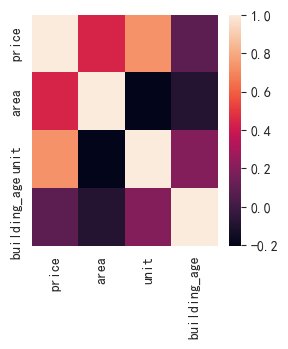

In [71]:
# 相关性热力图
plt.figure(figsize=(3,3))
sns.heatmap(a)

In [ ]:
"""
问题编号：A2
问题：全国房价总体分布是怎样的？是否存在极端值？
分析主题：描述性统计
分析目标：概览数值型字段的分布特征
分组字段：无
指标/方法：平均数/中位数/四分位数/标准差
"""

In [72]:
df.describe()

,area,price,unit,year,bed_room,living_room,building_age
count,25387.000000,25387.000000,25387.000000,25387.000000,25387.000000,25387.000000,25387.000000
mean,102.673502,112.220989,11275.168472,2013.106275,2.697168,1.845157,11.893725
std,32.836737,54.420570,5355.816139,6.024744,0.792152,0.407442,6.024744
min,20.000000,9.000000,1000.000000,1976.000000,0.000000,0.000000,2.000000
25%,85.000000,70.195000,7521.000000,2011.000000,2.000000,2.000000,8.000000
50%,99.000000,100.000000,10154.000000,2015.000000,3.000000,2.000000,10.000000
75%,122.000000,145.000000,13846.000000,2017.000000,3.000000,2.000000,14.000000
max,470.000000,267.000000,85288.000000,2023.000000,9.000000,12.000000,49.000000


<Axes: xlabel='price', ylabel='Count'>

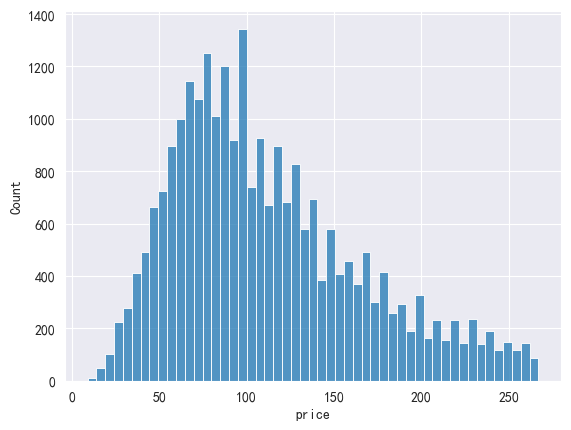

In [80]:
# 房价分布的直方图
#plt.hist(df['price'],bins=4)
sns.histplot(data=df,x='price')

In [ ]:
"""
问题编号：A6
问题：南北向是否真比单一朝向贵？贵多少？
分析主题：草朝向溢价
分析目标：评估不同朝向的价格差异
分组字段：toward
指标/方法：方差分析/多重比较
"""

In [86]:
# df['toward'].value_counts()
df.groupby('toward',observed=True).agg({
    'price':['mean','median'],
    'unit':'median',
    'building_age':'mean'
})

price            unit building_age
              mean median   median         mean
toward                                         
东北向     111.439903  100.0  12041.0    12.446602
东南向     111.175579  102.0  10800.0    10.931579
东向      106.186439   90.0  11281.5    12.682927
东西向      97.674667   82.0   8968.0    15.533333
北向       89.504724   75.0  11455.0    13.177165
南北向     114.184595  100.0   9786.0    12.023359
南向      109.910601  100.0  10575.0    11.540222
西北向     113.793101  105.0  12290.0    13.410853
西南向     133.369959  130.0  13152.0    13.526749
西向       96.946346   84.0  12384.0    13.346154

<Axes: xlabel='toward', ylabel='price'>

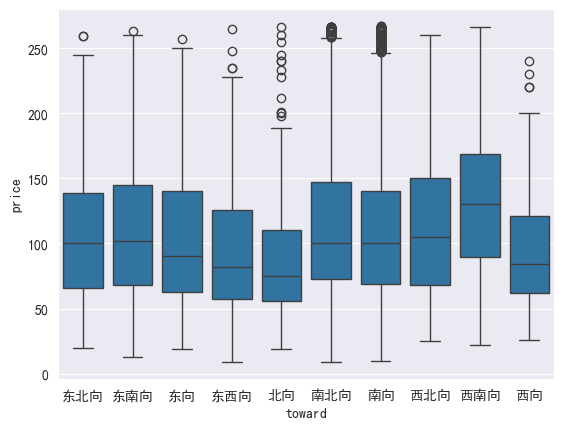

In [87]:
sns.boxplot(data=df,x='toward',y='price')